In [4]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
import spacy
import matplotlib.pyplot as plt

data = pickle.load(open('../data_done.pickle', 'rb'))

In [62]:
print(data[0].keys())
print('\n')
print(f'Number of works in dataset: {len(data)}')

dict_keys(['id', 'canon_type', 'canon', 'author_id', 'title', 'updated', 'lang', 'genres', 'rated', 'num_chapters', 'num_words', 'num_reviews', 'num_favs', 'num_follows', 'published', 'status', 'chapters', 'reviews'])


Number of works in dataset: 552


Text(0.5, 0, 'Words per Chapter')

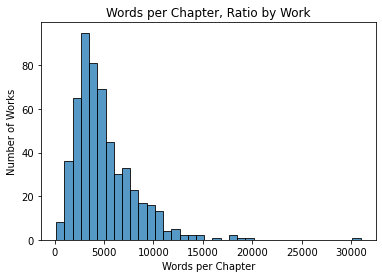

In [44]:
# get number of words per chapter
words_per_chapter = [work.get('num_words')/work.get('num_chapters') for work in data]

sns.histplot(words_per_chapter)
plt.title('Words per Chapter, Ratio by Work')
plt.ylabel("Number of Works")
plt.xlabel('Words per Chapter')

Text(0.5, 0, 'Number of Chapters')

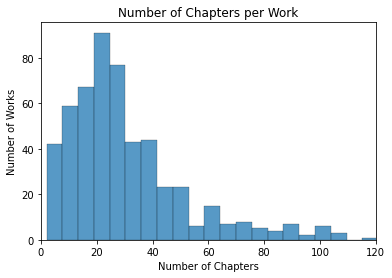

In [45]:
# number of chapters per work
num_chapters = [work.get('num_chapters') for work in data]

sns.histplot(num_chapters)
plt.xlim([0,120])
plt.title('Number of Chapters per Work')
plt.ylabel("Number of Works")
plt.xlabel('Number of Chapters')

In [52]:
# count of genres and languages
from collections import Counter

genre_count = Counter()
lang_count = Counter()

for work in data:
    genre_count += Counter(work.get('genres'))
    lang_count += Counter([work.get('lang')])

print(f' top genres: {genre_count.most_common(5)}')
print(f' top languages: {lang_count.most_common(5)}')

 top genres: [('Romance', 265), ('Adventure', 177), ('Humor', 111), ('Drama', 97), ('Friendship', 59)]
 top languages: [('English', 551), ('Spanish', 1)]


Text(0.5, 0, 'Number of Works by same Author')

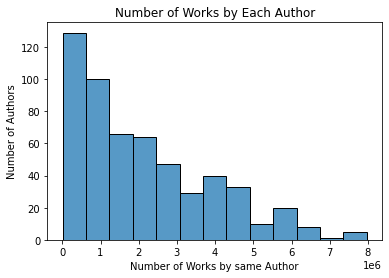

In [58]:
# count of works by each author
works_per_author = [work.get('author_id') for work in data]

sns.histplot(works_per_author)
plt.title('Number of Works by Each Author')
plt.ylabel("Number of Authors")
plt.xlabel('Number of Works by same Author')

Text(0.5, 0, 'Year')

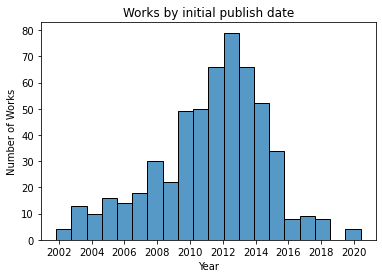

In [80]:
from datetime import datetime

publish_dates = [datetime.strptime(work.get('published'), '%b %d, %Y') for work in data]

sns.histplot(publish_dates)
plt.title('Works by initial publish date')
plt.ylabel("Number of Works")
plt.xlabel('Year')